## Import Modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import time 
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
import gensim

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec 
from scipy.stats import chi2_contingency

import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score


In [3]:
import import_ipynb
import capstone_functions_04
from capstone_functions_04 import clean_text, save_plot_function, get_average_word2vec

In [4]:
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

## Load Cleaned Dataset

In [6]:
clean_df = pd.read_csv('../data/cleaned_df_eda_01.csv')

In [7]:
clean_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,is_english
0,1,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unspecified,Unknown,Marketing,0,US,True
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,NZ,True
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Other,Not Applicable,Unspecified,Unknown,Unknown,0,US,True
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,True
4,5,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,True


In [8]:
# drop columns that have no impact for modelling or too many missing values, salary and deparmtnet have over 60% columns missing
clean_df.drop(columns=['job_id', 'salary_range', 'department', 'is_english'], axis=1, inplace=True)

In [9]:
clean_df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,0,Other,Internship,Unspecified,Unknown,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,0,Other,Not Applicable,Unspecified,Unknown,Unknown,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [10]:
# clean the rest of the null values
clean_df.isna().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
dtype: int64

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17731 entries, 0 to 17730
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17731 non-null  object
 1   location             17731 non-null  object
 2   company_profile      17731 non-null  object
 3   description          17731 non-null  object
 4   requirements         17731 non-null  object
 5   benefits             17731 non-null  object
 6   telecommuting        17731 non-null  int64 
 7   has_company_logo     17731 non-null  int64 
 8   has_questions        17731 non-null  int64 
 9   employment_type      17731 non-null  object
 10  required_experience  17731 non-null  object
 11  required_education   17731 non-null  object
 12  industry             17731 non-null  object
 13  function             17731 non-null  object
 14  fraudulent           17731 non-null  int64 
 15  country              17731 non-null  object
dtypes: i

## Feature Engineering

In [13]:
# create variable for textual columns and categorical columns 
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

In [14]:
category_columns = ['country', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']   

### Convert Categorical Columns with One hot Encoding

In [16]:
clean_df[category_columns].nunique().sort_values(ascending=False)

industry               132
country                 91
function                38
required_education      13
required_experience      7
employment_type          5
dtype: int64

Value counts for potential one hot encoding features:
* country (91), industry (132)
* employment_type(6), required_experience(8), required_education(14), function(38)
* Will convert them all using one hot encoding but check to see if target encoding would bbe more suitable for high cardinality features

In [18]:
# Use OneHotEncoder to convert categorical columns 
one_hot_encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_cat = one_hot_encode.fit_transform(clean_df[category_columns])

# Get feature names and store in a dataframe
category_feature_names = one_hot_encode.get_feature_names_out(category_columns)

X_cat_df = pd.DataFrame(X_cat, columns=category_feature_names)

X_cat_df.index = clean_df.index

X_cat_df.head()

,country_AE,country_AL,country_AM,country_AR,country_AT,country_AU,country_BD,country_BE,country_BG,country_BH,...,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Unknown,function_Writing/Editing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_cat_df.shape

(17731, 286)

### Clean textual data for modelling

Adding removal of bigrams 
* Loop through token list
* Check bigrams in defined set
* Skips both words if a match is found
* Clean text string without stop_bigrams

In [22]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [23]:
# found customer service, year experience, communication skill to appear in both word clouds
# create stop_bigrams variable to remove them from the clean_text column 
stop_bigrams = {'customer service', 'yeat_experience', 'communication skill', 'year experience', 'ability work'}

# use clean_text function
def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'\[.*?\]', '', text) # remove anything inside square brackets
    text = re.sub(r'http\S+|https\S+|www\S+|url_\w+', '', text) # remove all urls with 
    text = re.sub(r'\d+', '', text) # remove all digits
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip() # remove multiple spaces and strip leading/trailing whitespace

    words = nltk.word_tokenize(text)
    words = [lemma.lemmatize(word) for word in words if word not in stop_words]

    # remove bigrams 
    i = 0
    clean_words = []
    while i < len(words):
        if i < len(words) - 1:
            pair = f'{words[i]} {words[i+1]}'
            if pair in stop_bigrams:
                i += 2
                continue
        clean_words.append(words[i])
        i += 1

    return ' '.join(clean_words)  

In [24]:
%%time

# combine textual columns
clean_df['combined_text'] = (
    clean_df['title'] +
    clean_df['location'] +
    clean_df['company_profile'] +
    clean_df['description'] +
    clean_df['requirements'] +
    clean_df['benefits']
)

clean_df['combined_text'] = clean_df['combined_text'].apply(clean_text)

CPU times: total: 1min 7s
Wall time: 1min 9s


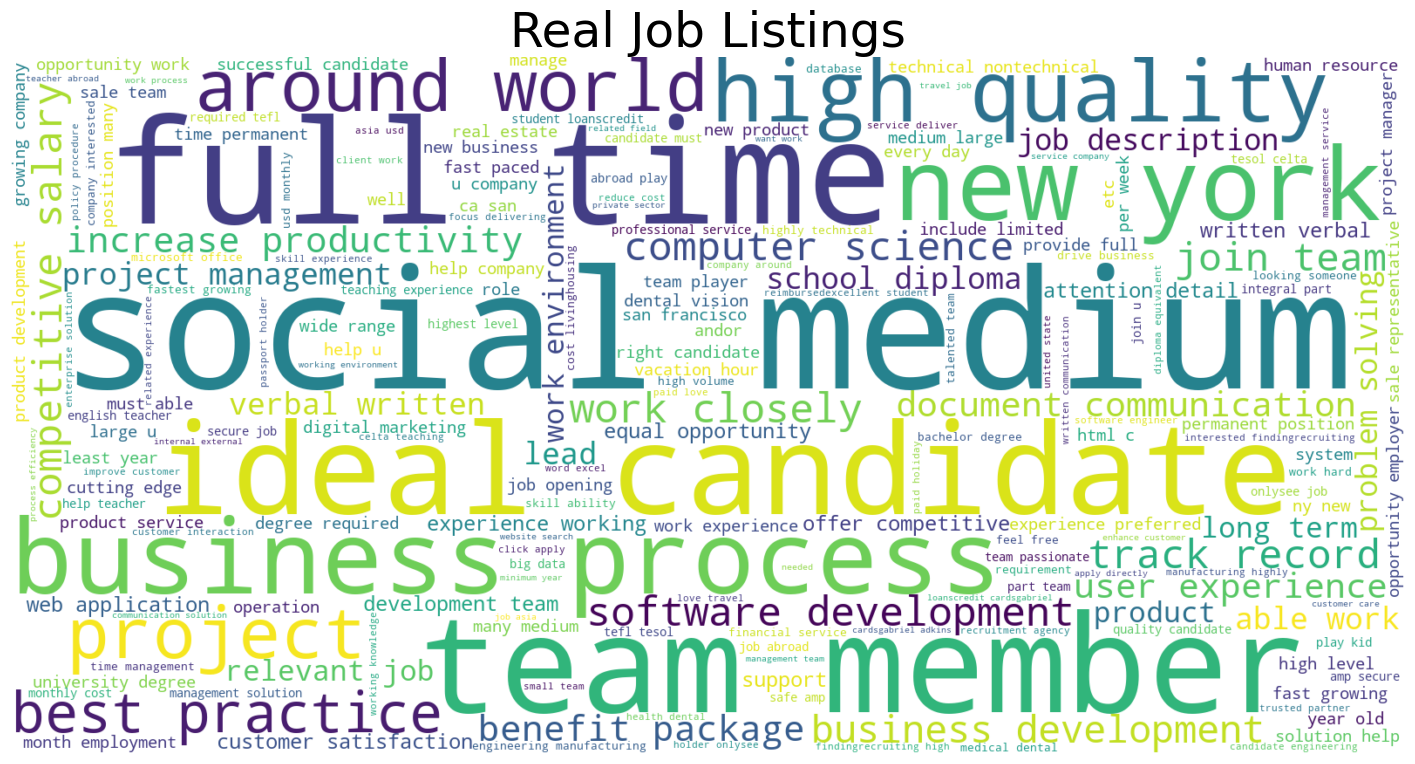

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image020.png


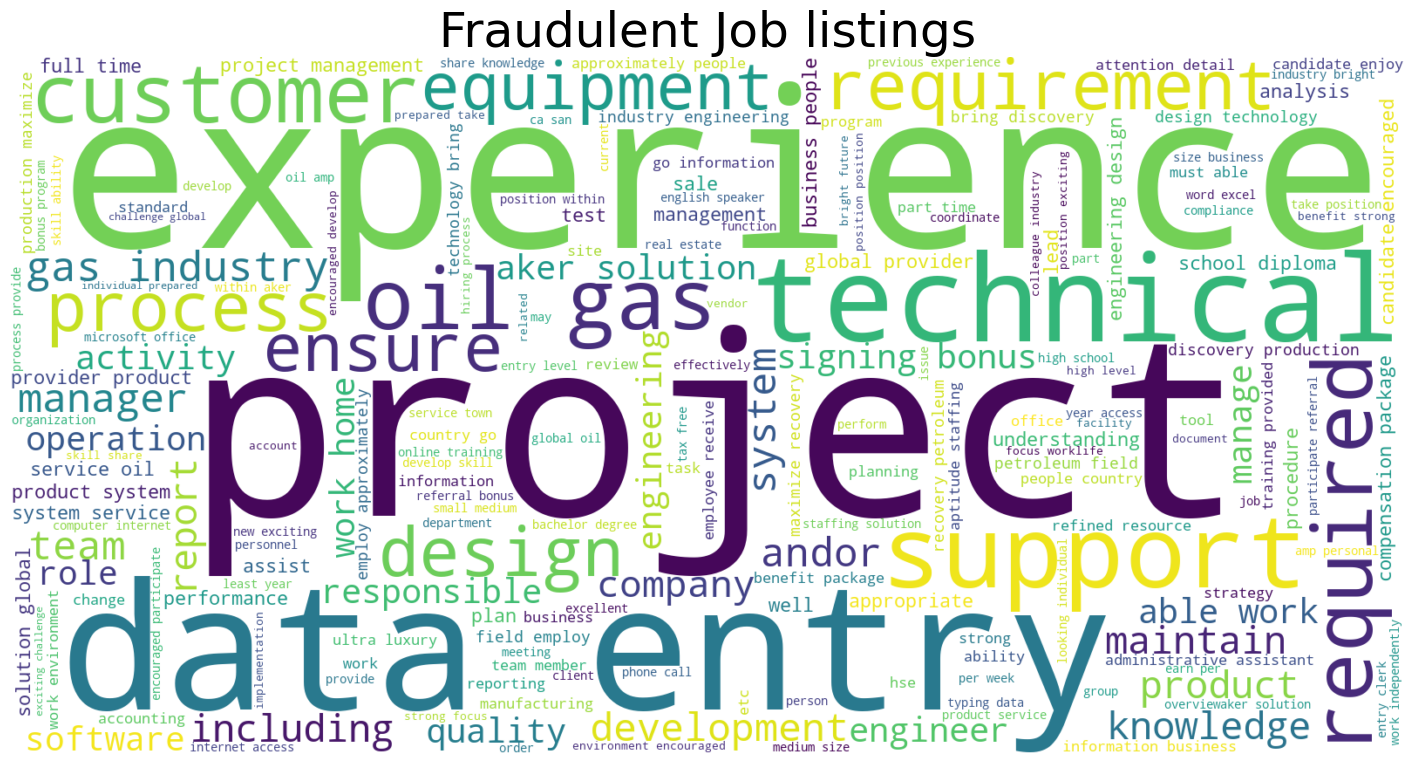

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image021.png


In [25]:
# visualise word cloud for real and fraudulent based off of the combined text 

# Create word cloud for real vs fraudulent job descriptions
real_combined_text = ' '. join(clean_df[clean_df['fraudulent']==0]['combined_text'])
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='white').generate(real_combined_text)

# Plot cloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Real Job Listings', size=35)

save_plot_function(20)

fraud_combined_text = ' '. join(clean_df[clean_df['fraudulent']==1]['combined_text'])
wordcloud = WordCloud(width=1600, 
                      height=800, 
                      background_color='white').generate(fraud_combined_text)
# Plot cloud
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fraudulent Job listings', size=35)

save_plot_function(21)

In [26]:
clean_df['combined_text'][0]

'marketing internus ny new yorkwere food weve created groundbreaking awardwinning cooking site support connect celebrate home cook give everything need one placewe top editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today showwere located chelsea new york cityfood fastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work small team editor executive developer new york city headquartersreproducing andor repackaging existing food content number partner site huffington post yahoo buzzfeed various cont

### Plot most frequent bigrams and trigrams

In [28]:
corpus_real = clean_df[clean_df['fraudulent'] == 0]['combined_text'].astype(str)
corpus_fake = clean_df[clean_df['fraudulent'] == 1]['combined_text'].astype(str)
number_of_samples = 10

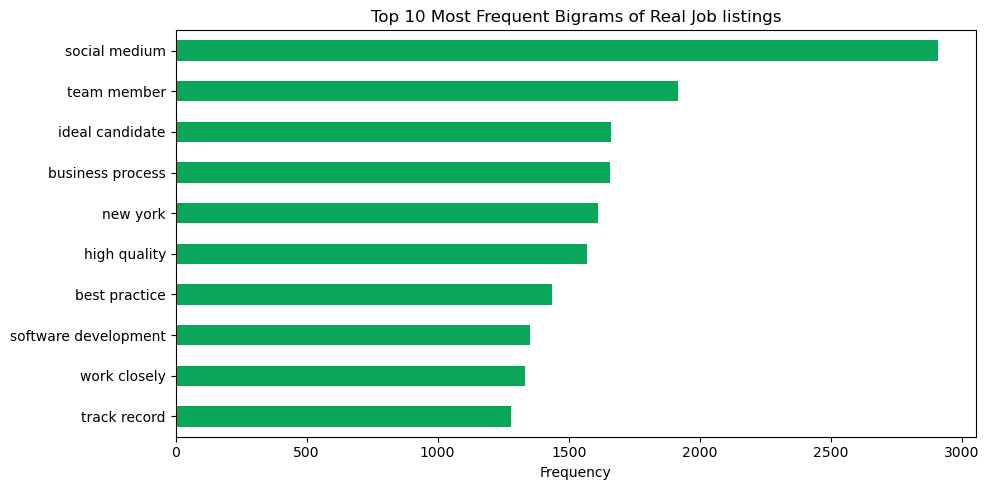

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image022.png


In [29]:
vectorizer_bi = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bi = vectorizer_bi.fit_transform(corpus_real)
bi_freq = X_bi.sum(axis=0).A1
bi_words = vectorizer_bi.get_feature_names_out()
bigram_freq = pd.Series(bi_freq, index=bi_words).sort_values(ascending=False).head(number_of_samples)

plt.figure(figsize=(10,5))
bigram_freq.plot(kind='barh', color='#0aa65a')
plt.title(f'Top {number_of_samples} Most Frequent Bigrams of Real Job listings')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
save_plot_function(22)

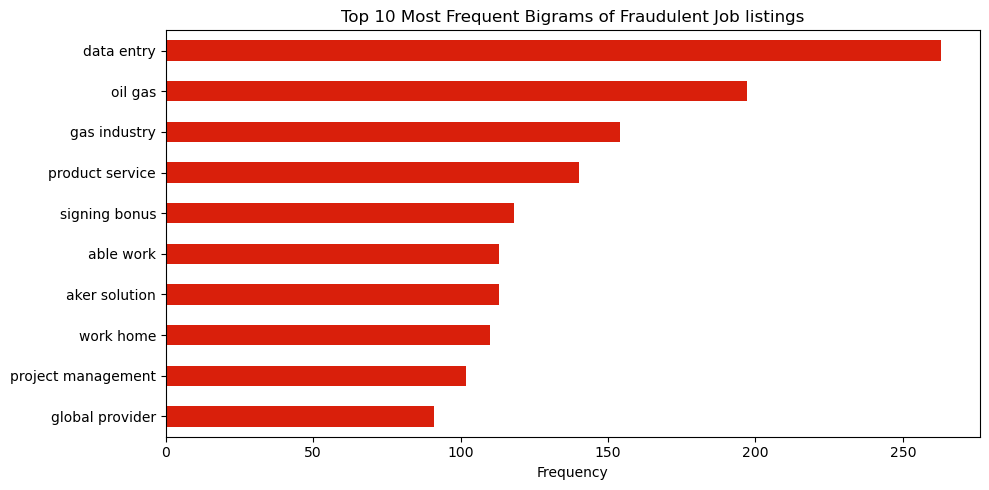

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image023.png


In [30]:
vectorizer_bi = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bi = vectorizer_bi.fit_transform(corpus_fake)
bi_freq = X_bi.sum(axis=0).A1
bi_words = vectorizer_bi.get_feature_names_out()
bigram_freq = pd.Series(bi_freq, index=bi_words).sort_values(ascending=False).head(number_of_samples)

plt.figure(figsize=(10,5))
bigram_freq.plot(kind='barh', color='#d91f0b')
plt.title(f'Top {number_of_samples} Most Frequent Bigrams of Fraudulent Job listings')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
save_plot_function(23)

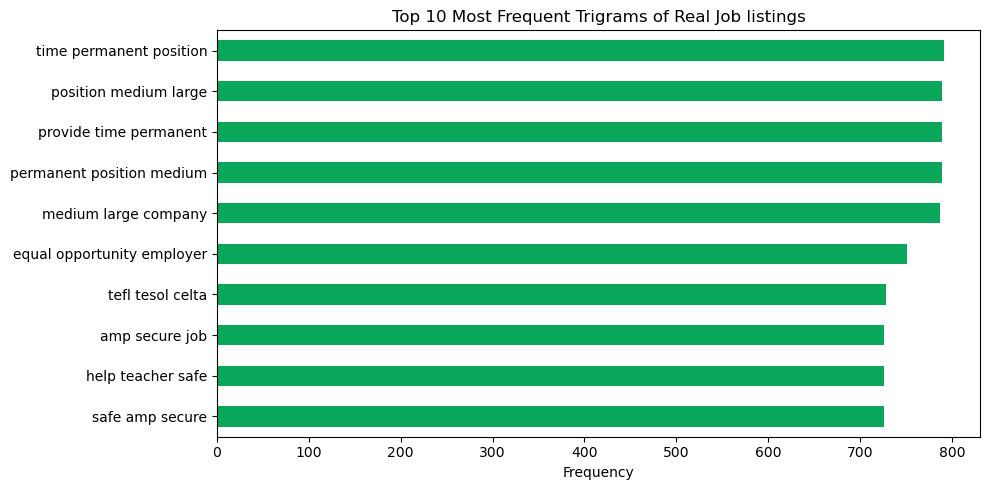

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image024.png


In [31]:
vectorizer_tri = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_tri = vectorizer_tri.fit_transform(corpus_real)
tri_freq = X_tri.sum(axis=0).A1
tri_words = vectorizer_tri.get_feature_names_out()
trigram_freq = pd.Series(tri_freq, index=tri_words).sort_values(ascending=False).head(number_of_samples)

plt.figure(figsize=(10,5))
trigram_freq.plot(kind='barh', color='#0aa65a')
plt.title(f'Top {number_of_samples} Most Frequent Trigrams of Real Job listings')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
save_plot_function(24)

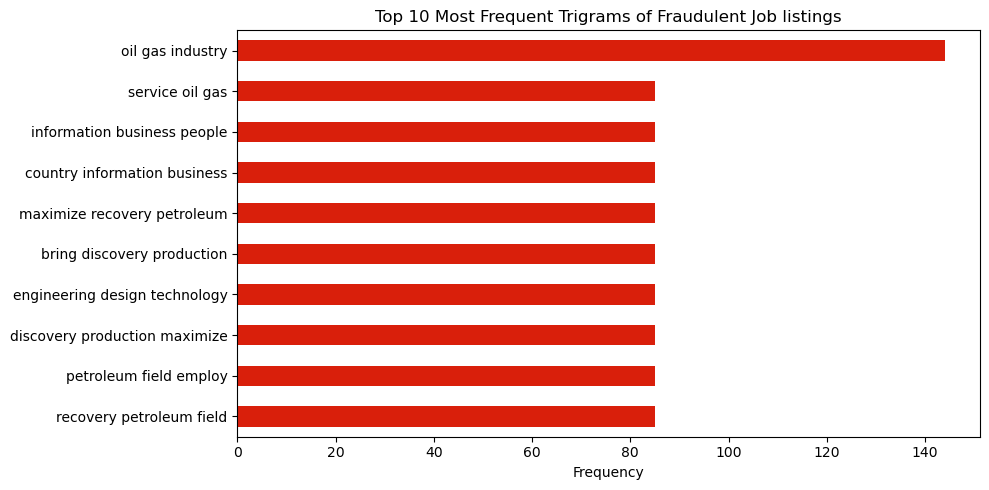

Plot saved to: C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\images\image025.png


In [32]:
vectorizer_tri = CountVectorizer(ngram_range=(3,3), stop_words='english')
X_tri = vectorizer_tri.fit_transform(corpus_fake)
tri_freq = X_tri.sum(axis=0).A1
tri_words = vectorizer_tri.get_feature_names_out()
trigram_freq = pd.Series(tri_freq, index=tri_words).sort_values(ascending=False).head(number_of_samples)

plt.figure(figsize=(10,5))
trigram_freq.plot(kind='barh', color='#d91f0b')
plt.title(f'Top {number_of_samples} Most Frequent Trigrams of Fraudulent Job listings')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.tight_layout()
save_plot_function(25)

## TF-IDF_df

In [34]:
# Use TF-IDF then add onehotencoded columns and boolean features from original dataset
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf_text = tfidf_vectorizer.fit_transform(clean_df['combined_text'])
X_tfidf_df = pd.DataFrame(
    X_tfidf_text.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out(), 
    index=clean_df.index
)

In [35]:
# confirm how new dataframe looks
X_tfidf_df.head()

,ab,ability,able,abroad,academic,accept,access,accommodation,accordance,according,...,year,yeast,yes,york,youll,young,youre,youth,youve,zealand
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.158268,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.014253,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.08296,0.078619,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.023638,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.038667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.033144,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# check the shape of the combined dataframe
X_tfidf_df.shape

(17731, 2000)

In [37]:
# create new df that has the three numeric features from clean_df
X_numeric_df = clean_df[['telecommuting', 'has_company_logo', 'has_questions']].reset_index(drop=True)

In [38]:
# concat the three dataframes into one that specifies this is the Term Frequency-Inverse Document Frequency vectorizer
X_tfidf_full_df = pd.concat([X_tfidf_df.reset_index(drop=True),
                             X_cat_df.reset_index(drop=True),
                             X_numeric_df.reset_index(drop=True)],
                            axis=1)

In [39]:
# confirm shape of the combined dataframe is the same size as the original
# large number of features, might need PCA to reduce dimensionality
X_tfidf_full_df.shape

(17731, 2289)

In [40]:
# create target variable identifier as y for train test split in modelling notebook

y = clean_df['fraudulent']

### Save TF-IDF as .csv file 

In [42]:
# create file path for tfidf dataframe and target variable

# tfidf_full_df path
filepath_tfidf = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\X_tfidf_full_df.csv')
filepath_tfidf.parent.mkdir(parents=True, exist_ok=True)
X_tfidf_full_df.to_csv(filepath_tfidf, index=False)

#target variable path
filepath_y = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\y_labels.csv')
filepath_y.parent.mkdir(parents=True, exist_ok=True)
y.to_csv(filepath_y, index=False)

## Word2Vec_df
Syntax
* vector_size : number of features per word
* window : context window size
* min_count : ignores words with frequency less than specified
* sg : skip-gram model, sg=1 better for small data / sg=0 better for larger data

In [44]:
# use Word2Vec model on combined_text columns in clean_df

# w2v_corpus will be a series of tokenized sentences
w2v_corpus = clean_df['combined_text'].apply(word_tokenize)

# convert w2v_corpus to a list
sentences = w2v_corpus.tolist()

# create word2vec model 
w2v_model = Word2Vec(sentences, vector_size=50, window=5, min_count=3, workers=4, sg=1)

# apply to all documents with average_word2vec function from functions notebook
word2vec_features = w2v_corpus.apply(lambda tokens: get_average_word2vec(tokens, w2v_model, 100))

# # convert to dataframe
X_word2vec_df = pd.DataFrame(word2vec_features.tolist(), index=clean_df.index)

In [45]:
X_word2vec_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.017138,-0.159839,0.460755,0.023336,-0.115755,-0.202072,0.150287,0.325418,0.233355,-0.470965,...,0.493401,-0.045173,-0.204231,-0.103302,0.478213,0.173837,0.088107,-0.349796,0.023353,0.324141
1,0.019095,0.058890,0.373609,0.240594,-0.186368,-0.225773,0.085899,0.361351,0.229013,-0.551452,...,0.320937,-0.120223,-0.069553,-0.188875,0.419364,0.329306,-0.036890,-0.260533,0.179654,0.411198
2,-0.182370,0.271558,0.691230,0.096485,-0.244653,-0.192222,-0.147374,0.372178,0.014570,-0.528263,...,0.609243,0.050810,0.082892,-0.239118,0.478563,0.160400,0.149440,-0.491289,0.323955,0.143979
3,-0.044269,0.081573,0.408168,-0.030975,-0.195649,-0.121655,-0.023067,0.498875,0.013364,-0.412252,...,0.599020,-0.008677,-0.147091,-0.154675,0.364876,0.356947,0.019779,-0.364122,0.239650,0.332000
4,-0.081571,0.074154,0.526774,0.084230,-0.385259,-0.039238,-0.020237,0.406547,0.003932,-0.400501,...,0.607872,0.019608,0.058434,-0.150448,0.362003,0.270395,0.114393,-0.417508,0.292528,0.332600


In [46]:
# concat all features into one full dataframe 
X_word2vec_full_df = pd.concat([
    X_word2vec_df.reset_index(drop=True), 
    X_cat_df.reset_index(drop=True),
    X_numeric_df.reset_index(drop=True)],
                               axis=1)

In [47]:
X_word2vec_full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Unknown,function_Writing/Editing,telecommuting,has_company_logo,has_questions
0,0.017138,-0.159839,0.460755,0.023336,-0.115755,-0.202072,0.150287,0.325418,0.233355,-0.470965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0.019095,0.058890,0.373609,0.240594,-0.186368,-0.225773,0.085899,0.361351,0.229013,-0.551452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2,-0.182370,0.271558,0.691230,0.096485,-0.244653,-0.192222,-0.147374,0.372178,0.014570,-0.528263,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0
3,-0.044269,0.081573,0.408168,-0.030975,-0.195649,-0.121655,-0.023067,0.498875,0.013364,-0.412252,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
4,-0.081571,0.074154,0.526774,0.084230,-0.385259,-0.039238,-0.020237,0.406547,0.003932,-0.400501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1


### Save Word2Vec_DF as .csv file 

In [49]:
# word2vec file path
path_word2vec = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\X_word2vec_full_df.csv')
path_word2vec.parent.mkdir(parents=True, exist_ok=True)
X_word2vec_full_df.to_csv(path_word2vec, index=False)

## CountVect DF

In [51]:
# reduce max_features to 2000 as model was not performing well in tuned model notebook
count_vec = CountVectorizer(stop_words='english', max_features=2000)

In [52]:
X_cv_text = count_vec.fit_transform(clean_df['combined_text'])
X_cv_df = pd.DataFrame(
    X_cv_text.toarray(), 
    columns=count_vec.get_feature_names_out(), 
    index=clean_df.index
)

In [53]:
X_cv_df.head()

,ab,ability,able,abroad,academic,accept,access,accommodation,accordance,according,...,year,yeast,yes,york,youll,young,youre,youth,youve,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# concat all features into one full dataframe 
X_cv_full_df = pd.concat([
    X_cv_df.reset_index(drop=True), 
    X_cat_df.reset_index(drop=True), 
    X_numeric_df.reset_index(drop=True)], axis=1)

### Save CountVec_DF as .csv file

In [56]:
# countvec file path
path_countvec = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\X_cv_full_df.csv')
path_countvec.parent.mkdir(parents=True, exist_ok=True)
X_cv_full_df.to_csv(path_countvec, index=False)

### Save Combined Text for CNN model and create path

In [58]:
# create cnn_df to store combined text column
cnn_df = clean_df[['combined_text']]

In [59]:
# CNN path
path_cnn = Path(r'C:\Users\hjame\Documents\Data Science\Mini Projects\capstoneProject\data\cnn_combined_text.csv')
path_cnn.parent.mkdir(parents=True, exist_ok=True)
cnn_df.to_csv(path_cnn, index=False)

### Logistic Regression TF-IDF

In [61]:
# # build Logistic Regression model
# lg_model = LogisticRegression(max_iter=1000, random_state=42)
# lg_model

In [62]:
# %%time
# # fit the model
# lg_model.fit(X_tfidf_train, y_train)

In [63]:
# y_pred_01 = lg_model.predict(X_tfidf_test)

In [64]:
# y_prob_01 = lg_model.predict_proba(X_tfidf_test)[:,1]

In [65]:
# acc_01 = accuracy_score(y_test, y_pred_01)
# acc_01

In [66]:
# cm_01 = metrics.confusion_matrix(y_test, y_pred_01)
# cm_01

In [67]:
# # plot confusion matrix
# fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# confuseLabels = ('Real', 'Fraudulent')
# # Confusion Matrix
# sns.heatmap(cm_01.T, square= True, annot= True, fmt= 'd',cbar= False, 
#             cmap= 'Blues', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# # Title 
# ax.set_title('Logistic Regression (TF-IDF) Confusion Matrix')
# ax.set_xlabel('True label')
# ax.set_ylabel('Predicted label')

# save_plot_function(30)

In [68]:
# lg_class_report = classification_report(y_test, y_pred_01)
# print(lg_class_report)

### Linear SVC TF-IDF

In [70]:
# svm_model = LinearSVC(max_iter=1000, random_state=42, dual='auto')
# svm_model

In [71]:
# %%time
# svm_model.fit(X_tfidf_train, y_train)

In [72]:
# score_svm = svm_model.score(X_tfidf_train, y_train)
# print('Train score:', score_svm)   

In [73]:
# # check the cross validation score
# cv_score = cross_val_score(svm_model, X_tfidf_train, y_train, cv=10)
# print('CV average score:', cv_score.mean())

In [74]:
# y_pred_02 = svm_model.predict(X_tfidf_test)

In [75]:
# decision_scores instead of probabilities
# decision_score = svm_model.decision_function(X_tfidf_test)
# print(decision_score)

In [76]:
# acc_02 = accuracy_score(y_test, y_pred_02)
# acc_02

In [77]:
# cm_02 = confusion_matrix(y_test, y_pred_02)
# print(cm_02)

In [78]:
# # plot confusion matrix
# fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
# confuseLabels = ('Real', 'Fraudulent')
# # Confusion Matrix
# sns.heatmap(cm_02.T, square= True, annot= True, fmt= 'd',cbar= False, 
#             cmap= 'Greens', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# # Title 
# ax.set_title('Linear SVC (TF-IDF) Confusion Matrix')
# ax.set_xlabel('True label')
# ax.set_ylabel('Predicted label')

# save_plot_function(31)

In [79]:
# svm_class_report = classification_report(y_test, y_pred_02)
# print(svm_class_report)

### Random Forest TF-IDF (03)

In [81]:
# rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
# rf_model

In [82]:
# rf_model.fit(X_tfidf_train, y_train)

In [83]:
# y_pred_03 = rf_model.predict(X_tfidf_test)

In [84]:
# y_prob_03 = rf_model.predict_proba(X_tfidf_test)[:,1]

In [85]:
# acc_03 = accuracy_score(y_test, y_pred_03)
# acc_03

In [86]:
# cm_03 = confusion_matrix(y_test, y_pred_03)
# cm_03

In [87]:
# fig, ax = plt.subplots(1, 1, figsize = (8, 6))
# fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

# # Confusion Matrix
# sns.heatmap(cm_03.T, square= True, annot= True, fmt= 'd',cbar= False, 
#             cmap= 'Reds', ax= ax, xticklabels= confuseLabels, yticklabels= confuseLabels)

# # Title 
# ax.set_title('Random Forest (TF-IDF) Confusion Matrix')
# ax.set_xlabel('True label')
# ax.set_ylabel('Predicted label')

# save_plot_function(32)

In [88]:
# rf_class_report = classification_report(y_test, y_pred_03)
# print(rf_class_report)

### Plot ROC curve

In [90]:
# # Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
# # preds04 = logRegHP.predict_proba(X_test)[:,1]
# # preds05 = grb.predict_proba(X_test)[:,1]
# # preds06 = ranForHP.predict_proba(X_test)[:,1]

# # Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
# fpr01, tpr01, _ = metrics.roc_curve(y_test, y_prob_01)
# fpr02, tpr02, _ = metrics.roc_curve(y_test, decision_score)
# fpr03, tpr03, _ = metrics.roc_curve(y_test, y_prob_03)

# # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
# roc_auc01 = metrics.auc(fpr01, tpr01)
# roc_auc02 = metrics.auc(fpr02, tpr02)
# roc_auc03 = metrics.auc(fpr03, tpr03)

# # Plot the ROC Curve
# plt.figure(figsize =(8, 6))
# lw = 2
# plt.plot(fpr01, tpr01, color='darkblue', lw = lw, label = 'Logistic Regression ROC curve (area = %0.2f)' % roc_auc01)
# plt.plot(fpr02, tpr02, color='darkgreen', lw = lw, label = 'Linear SVM ROC curve (area = %0.2f)' % roc_auc02)
# plt.plot(fpr03, tpr03, color='darkred', lw = lw, label = 'Random Forest ROC curve (area = %0.2f)' % roc_auc03)
# plt.plot([0, 1], [0, 1], color = 'black', lw = lw, linestyle = '--', label= 'Random Classifer')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.grid(alpha=0.5)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Predicting Fraudulent Jobs')
# plt.legend(loc = "lower right")

# save_plot_function(33)

### Plot Learning curve 

In [92]:
# def plot_learning_curve(
#     estimator,
#     title,
#     X,
#     y,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
# ):
#     """
#     Generate 3 plots: the test and training learning curve, the training
#     samples vs fit times curve, the fit times vs score curve.

#     Parameters
#     ----------
#     estimator : estimator instance
#         An estimator instance implementing `fit` and `predict` methods which
#         will be cloned for each validation.

#     title : str
#         Title for the chart.

#     X : array-like of shape (n_samples, n_features)
#         Training vector, where ``n_samples`` is the number of samples and
#         ``n_features`` is the number of features.

#     y : array-like of shape (n_samples) or (n_samples, n_features)
#         Target relative to ``X`` for classification or regression;
#         None for unsupervised learning.

#     axes : array-like of shape (3,), default=None
#         Axes to use for plotting the curves.

#     ylim : tuple of shape (2,), default=None
#         Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

#     cv : int, cross-validation generator or an iterable, default=None
#         Determines the cross-validation splitting strategy.
#         Possible inputs for cv are:

#           - None, to use the default 5-fold cross-validation,
#           - integer, to specify the number of folds.
#           - :term:`CV splitter`,
#           - An iterable yielding (train, test) splits as arrays of indices.

#         For integer/None inputs, if ``y`` is binary or multiclass,
#         :class:`StratifiedKFold` used. If the estimator is not a classifier
#         or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

#         Refer :ref:`User Guide <cross_validation>` for the various
#         cross-validators that can be used here.

#     n_jobs : int or None, default=None
#         Number of jobs to run in parallel.
#         ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
#         ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
#         for more details.

#     train_sizes : array-like of shape (n_ticks,)
#         Relative or absolute numbers of training examples that will be used to
#         generate the learning curve. If the ``dtype`` is float, it is regarded
#         as a fraction of the maximum size of the training set (that is
#         determined by the selected validation method), i.e. it has to be within
#         (0, 1]. Otherwise it is interpreted as absolute sizes of the training
#         sets. Note that for classification the number of samples usually have
#         to be big enough to contain at least one sample from each class.
#         (default: np.linspace(0.1, 1.0, 5))
#     """
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         estimator,
#         X,
#         y,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes[0].fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes[0].plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes[0].plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes[0].legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, "o-")
#     axes[1].fill_between(
#         train_sizes,
#         fit_times_mean - fit_times_std,
#         fit_times_mean + fit_times_std,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[2].grid()
#     axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[2].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

In [93]:
# # %%time
# fig, axes = plt.subplots(3, 3, figsize=(15, 20))

# title = "Learning Curves (Logistic Regression)"
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)

# estimator = lg_model
# plot_learning_curve(
#     estimator, title, X, y, axes= axes[:, 2], ylim= (0.8, 1.01), cv= cv, n_jobs= 4
# )


# title = "Learning Curves (Linear SVC)"
# # score curves, each time with 20% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)

# estimator = svm_model
# plot_learning_curve(
#     estimator, title, X, y, axes= axes[:, 0], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
# )

# # title 
# title = r"Learning Curves (Random Forest)"
# cv = ShuffleSplit(n_splits= 50, test_size= 0.2, random_state= 42)
# # score curves, each time with 20% data randomly selected as a validation set.

# estimator = rf_model
# plot_learning_curve(
#     estimator, title, X, y, axes= axes[:, 1], ylim= (0.0, 1.01), cv= cv, n_jobs= 4
# )


# save_plot_function(44)